In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
import h5py
from tqdm import tqdm
import time
import sys
sys.path.append("..")
sys.path.append("../development")
from RPLB_acc_LC import RPLB_acc_LC
from RPLB_acc_LC_analytical import RPLB_acc_LC_analytical

In [2]:
# initialize constants (SI units)
c = 2.99792458e8 #speed of light
m_e = 9.10938356e-31
q_e = 1.60217662e-19
e_0 = 8.85418782e-12
# set pure spectral properties
lambda_0 = 800e-9  # central wavelength
omega_0 = 2*np.pi*c/lambda_0
k_0 = omega_0/c
tau_0 = 10e-15  # FL pulse duration 1/e2 intensity half-width (same def as beam waist)
a = 125/k_0
w_0 = np.sqrt(2)*np.sqrt(np.sqrt(1+(a*k_0)**2)-1)/k_0
print(w_0)
print(np.sqrt(2*a/k_0))
# calculate Rayleigh range
z_R = np.pi*w_0**2/lambda_0
# beam power
P = 10e12
# spectral phase
phi_2 = 0.0*(1e-15)**2
phi_3 = 0.0*(1e-15)**3
# intial electron velocity
beta_0 = 0
# set tuning parameters
t_0 = -10*tau_0
z_0 = 0.0
Psi_0 = 0.0*np.pi
# set LC
tau_p = 1*tau_0

2.0051319796881284e-06
2.0131684841794813e-06


In [3]:
start = time.time()
time0, z0, beta0, KE0 = RPLB_acc_LC(lambda_0, tau_0, w_0, P, Psi_0, phi_2, phi_3, t_0, z_0, beta_0, tau_p)
middle = time.time()
time1, z1, beta1, KE1 = RPLB_acc_LC_analytical(lambda_0, tau_0, w_0, P, Psi_0, phi_2, phi_3, t_0, z_0, beta_0, tau_p)
end = time.time()

C:\Users\spenc\Desktop\Code_repositories\RPLB-acc\testing\../development\RPLB_acc_LC_analytical.py:62: RuntimeWarning: overflow encountered in multiply
  field_total = Amp*field_temp*env_temp*const
C:\Users\spenc\Desktop\Code_repositories\RPLB-acc\testing\../development\RPLB_acc_LC_analytical.py:62: RuntimeWarning: invalid value encountered in cdouble_scalars
  field_total = Amp*field_temp*env_temp*const


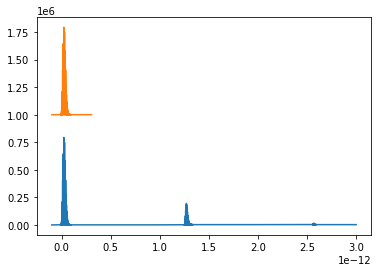

In [4]:
plt.plot(time0, KE0+0e6)
plt.plot(time1, KE1+1e6)

In [5]:
print(middle-start)
print(end-middle)

4.685641765594482
942.3187766075134
